# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. Задача проекта - провести исследовательский анализ и выявить факторы, влияющие на стоимость квартиры. 

[Шаг 1. Загрузка и предобработка данных](#step1) 

- Проверка на дубликаты
- Обработка пропусков
- Вычисление дополнительных параметров
- Приведение данных к нужным типам

[Шаг 2. Исследовательский анализ данных](#step2)
 - Графики распределения признаков
 - Исследование время продажи квартиры
 - Удаление выбросов

[Шаг 3. Факторы, влияющие на стоимость квартиры](#step3)

- Исследование факторов, влияющих на стоимость квартиры
- 10 населённых пунктов с наибольшим числом объявлений и средняя цена за метр
- Исследование факторов, влияющих на стоимость квартиры в центре Санкт-Петербурга, в городе и в Лен. обл.


[Шаг 4. Вывод](#step4)

## <a id="step1">Шаг 1. Загрузка и предобработка данных </a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
real_estate_data = pd.read_csv(r'L:\Data Analyst\2. Исследовательский анализ данных. Исследование объявлений о продаже квартир/real_estate_data.csv', sep = '\t')
pd.set_option('display.max_columns', None)
real_estate_data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17916,16,9300000.0,83.7,2018-02-01T00:00:00,3,2.75,15.0,51.0,2,NaN,False,False,11.0,NaN,Санкт-Петербург,13990.0,12786.0,0.0,NaN,0.0,NaN,184.0
12001,8,3750000.0,45.0,2019-03-26T00:00:00,2,2.60,9.0,27.3,6,NaN,False,False,6.5,NaN,Красное Село,24675.0,28100.0,0.0,NaN,0.0,NaN,14.0
13449,15,5100000.0,36.0,2018-07-10T00:00:00,1,2.60,25.0,18.0,22,NaN,False,False,9.0,NaN,Санкт-Петербург,36688.0,11841.0,0.0,NaN,2.0,981.0,67.0


In [3]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Всего в таблице 22 столбца и 23699 строк. Во многих столбцах есть пропуски, т.к. где-то данные не указал сам пользователь, заполнявший объявление на сайте, какие-то данные не подтянулись на основе картографических данных(расстояние до центра, аэропорта, ближайшего парка и водоёма). Прежде чем переходить к решению основной задачи, произведем предобработку данных, более пристально рассмотрим случаи с пропущенными данными и заполним пропуски там, где это целесообразно. Тип данных для более удобного чтения таблицы стоит перевести во всех столбцах в цельночислительный.

Столбцы собержат следующую информацию:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах(м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Предобработка данных

In [4]:
#запишем в переменную изначальный размер датасета
original_size = real_estate_data.shape[0]

In [5]:
# проверим есть ли дубликаты в датасете
real_estate_data.duplicated().sum()

0

In [6]:
rooms = real_estate_data['rooms'].unique()
#напишем функцию, заменяющую пропуски в столбце на медианное значение в зависимости от количества комнат в квартире
def fill_in(data, rooms, column):
    filtered_data = data[data['rooms'] == rooms]
    median = filtered_data[column].median()
    data.loc[data['rooms'] == rooms, column] = data.loc[data['rooms'] == rooms, column].fillna(median)
# применим функцию к столбцам living_area и kitchen_area
for room in rooms:
    fill_in(real_estate_data, room, 'living_area')
    fill_in(real_estate_data, room, 'kitchen_area')

Для квартир, где указано нулевое количество комнат, нет площади кухни. Это как правило студии, в которых невозможно вычислить точную площадь кухни.

In [7]:
#real_estate_data['kitchen_area'] = np.where(real_estate_data['kitchen_area'].isnull(), real_estate_data['total_area'] - real_estate_data['living_area'], real_estate_data['kitchen_area'])

In [8]:
#заменим отсутсвующие значения в столбце balcony на нули, предположив, что раз параметр не заполнен, значит балкона нет
real_estate_data['balcony'] = real_estate_data['balcony'].fillna(0)
#если значение в столбце is_apartment пропущено, то будем считать, что квартира апартаментами не является. 
#т.к таких предложений довольно мало на рынке недвижимости
real_estate_data['is_apartment'] = real_estate_data['is_apartment'].fillna(False)

In [9]:
#посмотрим в каких строках отстутсвуют значения в столбце floors_total
real_estate_data[real_estate_data['floors_total'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,False,False,False,12.00,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,False,False,False,9.04,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,False,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,False,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,17.60,9,False,False,False,9.04,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,30.50,3,False,False,False,8.80,0.0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,False,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,False,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,False,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [10]:
#таких строк всего 86, пропуски случайны и не зависят от других столбцов, пропуски можно безболезненно удалить
real_estate_data = real_estate_data.dropna(subset = ['floors_total']).reset_index(drop = True)

In [11]:
#Посмотрим как распределяется высота потолков в столбце ceiling_height
real_estate_data['ceiling_height'].describe()

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Медианное значение составляет **2,65** метра. Среднее значение отличается от него не критично, но видим выбросы со значением высоты потолков в **1** и **100** метров. При этом, содержимое столбца потребуется нам для дальнейшего анализа. Поэтому заполним значения высоты потолков медианными значениями в зависимости от этажности здания. 

In [12]:
# создадим сводную таблицу, посмотрим на медианные значения в зависимости от этажности здания
ceiling_medians = real_estate_data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.head(15)

,median,count
,ceiling_height,ceiling_height
floors_total,,
1.0,2.80,10
2.0,2.70,215
3.0,2.80,399
4.0,3.00,789
5.0,2.55,3666
6.0,3.00,619
7.0,3.00,398
8.0,2.80,220


В типовых 5-ти и 9-ти этажках потолки высотой 2.55 метра, в частных домах и более новых и высотных строениях - выше. В 4-х, 6-ти, 7-ми этажных домах медианное значение находится на уровне трёх метров. Возможно это историческая застройка Петербурга.

In [13]:
# заполним пропуски в столбце ceiling_height
for floor in ceiling_medians.index:
    median = ceiling_medians.loc[floor, 'median'][0]
    if median != median:
        median = real_estate_data['floors_total'].median()
    real_estate_data.loc[real_estate_data['floors_total'] == floor, 'ceiling_height'] = real_estate_data.loc[real_estate_data['floors_total'] == floor, 'ceiling_height'].fillna(median)

In [14]:
#обработаем пропуски в столбце locality_name:
#найдем максимальное отдаление от центра, на его основе заменим значения столбца locality_name на Санкт_Петербург или Город N
max_distance = real_estate_data.loc[real_estate_data['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'].max()
real_estate_data.loc[real_estate_data['cityCenters_nearest'] <= max_distance, 'locality_name'] = real_estate_data.loc[real_estate_data['cityCenters_nearest'] <= max_distance, 'locality_name'].fillna('Санкт-Петербург')
real_estate_data.loc[real_estate_data['cityCenters_nearest'] >= max_distance, 'locality_name'] = real_estate_data.loc[real_estate_data['cityCenters_nearest'] >= max_distance, 'locality_name'].fillna('Город N')
#осталось всего 8 строк, где пропущено и имя города, и расстояние до центра, их можно удалить
real_estate_data = real_estate_data.dropna(subset = ['locality_name']).reset_index(drop = True)

Пропуски в столбце `days_exposition` мы не можем заполнить, т.к. не знаем, когда была произведена выгрузка. Предположим, что эти объявления еще не сняты с публикации на сайте.

Столбцы `cityCenters_nearest`, `airports_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` заполняются автоматически на основе картографических данных и содержат достаточно большое количество пропусков, стоит обратится к сотрудникам, собирающим данные, возможно ситуацию можно поправить. А пока заполним пропуски на медианные значения в зависимости от населенного пункта.

In [15]:
#для начала обработаем дубликаты для населенных пунктов Мурино и Кудрово, т.к. в датасете они встречаются под разными названиями
real_estate_data['locality_name'] = real_estate_data['locality_name'].replace('деревня Кудрово', 'Кудрово')
real_estate_data['locality_name'] = real_estate_data['locality_name'].replace('поселок Мурино', 'Мурино')
real_estate_data['locality_name'] = real_estate_data['locality_name'].replace('посёлок Мурино', 'Мурино')

In [16]:
#заменим значения на медианные в зависимости от населенного пункта
towns = real_estate_data['locality_name'].unique()
def fill_in_with_median(data, column, town):
    locality_name = data['locality_name']
    median = data.loc[locality_name == town, column].median()
    if median != median: #если медиану найти не удаётся из-за того, что все значения по городу NaN, то возьмём среднее по Лен.Области
        median = data.loc[locality_name != 'Санкт-Петербург', column].median()
    data.loc[locality_name == town, column] = data.loc[locality_name == town, column].fillna(median)
for column in ['cityCenters_nearest', 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']:
    for town in towns:
        fill_in_with_median(real_estate_data, column, town)

In [17]:
#проверим результаты предобработки
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23605 entries, 0 to 23604
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23605 non-null  int64  
 1   last_price            23605 non-null  float64
 2   total_area            23605 non-null  float64
 3   first_day_exposition  23605 non-null  object 
 4   rooms                 23605 non-null  int64  
 5   ceiling_height        23605 non-null  float64
 6   floors_total          23605 non-null  float64
 7   living_area           23605 non-null  float64
 8   floor                 23605 non-null  int64  
 9   is_apartment          23605 non-null  bool   
 10  studio                23605 non-null  bool   
 11  open_plan             23605 non-null  bool   
 12  kitchen_area          23411 non-null  float64
 13  balcony               23605 non-null  float64
 14  locality_name         23605 non-null  object 
 15  airports_nearest   

В данных было большое количество пропусков. Пропущенные значения в столбцах с автоматически собранными данными были обработаны при помощи медиан, зависящих от названия населеного пункта. Средняя жилая площадь  и площадь кухни были посчитаны исходя из количества комнат в квартире. Пропуски в столбце балконы были заменены на нули, а в столбце апартаменты на False, т.к. предполагется, что пропуск в этих столбцах подразумевает отсутствие положительного ответа на вопрос. Пропуски остались только в столбце `kitchen_area`, т.к. невозможно посчитать площадь кухни для квартиры студии, и в столбце `days_exposition`, т.к. не все объявления были закрыты на момент выгрузки.

### Вычисление дополнительных параметров

In [18]:
#заменим строковый тип данных на дату, нам нужны только год, месяц и день
real_estate_data['first_day_exposition'] = pd.to_datetime(real_estate_data['first_day_exposition'], format='%Y-%m-%d')
#добавим день, месяц и год
real_estate_data['day'] = real_estate_data['first_day_exposition'].dt.weekday
real_estate_data['month'] = pd.DatetimeIndex(real_estate_data['first_day_exposition']).month
real_estate_data['year'] = pd.DatetimeIndex(real_estate_data['first_day_exposition']).year

In [19]:
#посчитаем цену квадратного метра и добавим в таблицу
real_estate_data['price_per_square_metre'] = real_estate_data['last_price'] / real_estate_data['total_area']

In [20]:
#напишем функцию, определяющую тип этажа
def floor_kind(data):
    floor = data['floor']
    last_floor = data['floors_total']
    if floor == 1:
        return 'первый'
    if floor == last_floor:
        return 'последний'
    return 'другой'
#добавим тип этажа в отдельный столбец    
real_estate_data['kind_of_floor'] = real_estate_data.apply(floor_kind, axis = 1)

In [21]:
#посчитаем и добавим в таблицу соотношение жилой и общей площади
real_estate_data['living_area_ratio'] = real_estate_data['living_area'] / real_estate_data['total_area']

#посчитаем и добавим в таблицу отношение площади кухни к общей
real_estate_data['kitchen_area_ratio'] = real_estate_data['kitchen_area'] / real_estate_data['total_area']

В таблицу были добавлены новые столбцы, содержащие следующие значения:цена квадратного метра, тип этажа, соотношение жилой и общей площади, отношение площади кухни к общей, день, месяц и год даты размещения объявления

### Замена типов данных

In [22]:
#заменим тип данных в столбцах на целочисленный
list_to_int = ['last_price', 'price_per_square_metre', 'balcony', 'ponds_around3000', 'ponds_nearest', 'floors_total', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'days_exposition'] 

for column in list_to_int:
    real_estate_data[column] = real_estate_data[real_estate_data[column].notnull()][column].astype('int')

In [23]:
#округлим в этих столбцах данные до 1го знака после запятой
list_to_float = ['total_area', 'living_area', 'kitchen_area']
for column in list_to_float:
    real_estate_data[column] = real_estate_data[real_estate_data[column].notnull()][column].round(1)
    
#a в этих столбцах до 2го знака после запятой
for column in ['living_area_ratio', 'kitchen_area_ratio']:
    real_estate_data[column] = real_estate_data[real_estate_data[column].notnull()][column].round(2)    

Для облегчения восприятия данные в большинстве столбцов были приведены к цельночисленному виду. Площади имело смысл ограничить одной цифрой после запятой, отнощения площадей - двумя знаками. 

### Вывод

Дубликаты в датасете отсутствуют, проспуки были обработаны там, где это было целесообразно. Природу возникновения пропусков в данных, подтягиваемых автоматически, стоит уточнить. Такие дополнительные параметры как тип этажа и цена за квадратный метр были добавлены в датафрейм. Данные приведены к нужным типам и готовы к анализу.

## <a id="step2">Шаг 2. Исследовательский анализ данных </a>

### Графики распределения признаков

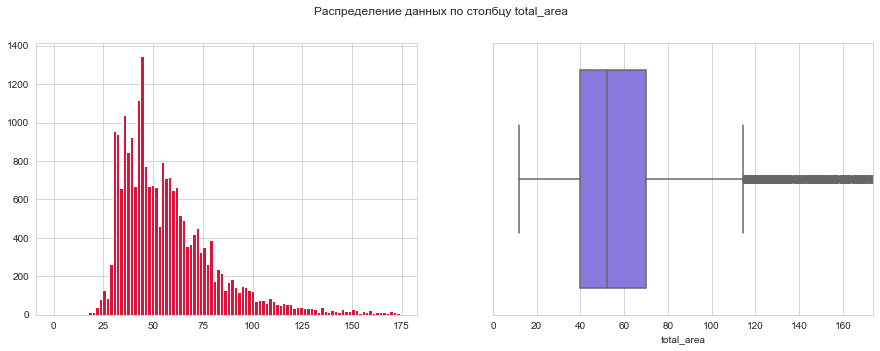

count    23605.000000
mean        60.338208
std         35.653521
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: object
 
10 часто встречающихся значений
45.0    420
42.0    385
44.0    349
60.0    348
31.0    346
40.0    315
43.0    306
32.0    290
36.0    290
46.0    284
Name: total_area, dtype: int64


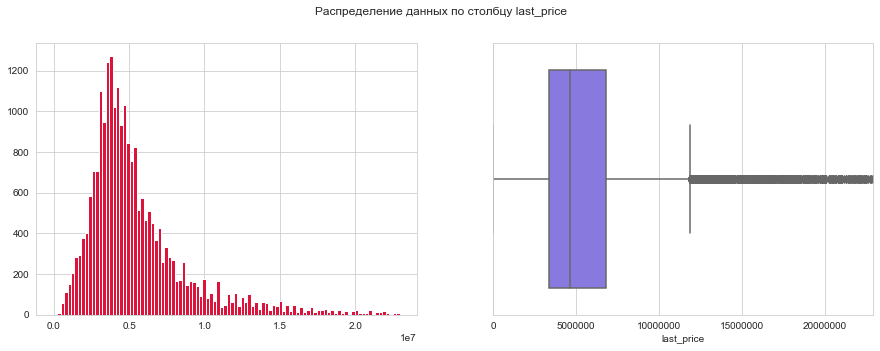

count        23605.000000
mean       6541286.922178
std       10903460.536815
min          12190.000000
25%        3400000.000000
50%        4650000.000000
75%        6799000.000000
max      763000000.000000
Name: last_price, dtype: object
 
10 часто встречающихся значений
4500000    341
3500000    291
4300000    260
4000000    260
4200000    259
3600000    256
3300000    243
3800000    240
3200000    237
3700000    234
Name: last_price, dtype: int64


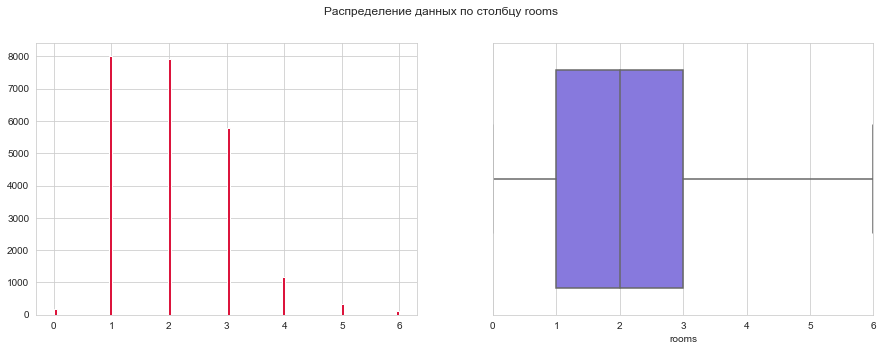

count    23605.000000
mean         2.071129
std          1.078466
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: object
 
10 часто встречающихся значений
1    8013
2    7910
3    5792
4    1177
5     325
0     194
6     104
7      59
8      12
9       8
Name: rooms, dtype: int64


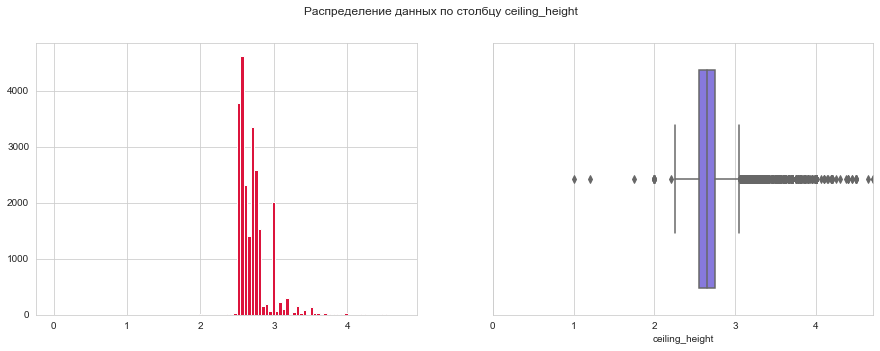

count    23605.000000
mean         2.736199
std          0.997066
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: object
 
10 часто встречающихся значений
2.55    4302
2.50    3515
2.70    3264
2.75    2429
2.60    2291
3.00    2009
2.80    1442
2.65    1183
3.20     277
3.10     203
Name: ceiling_height, dtype: int64


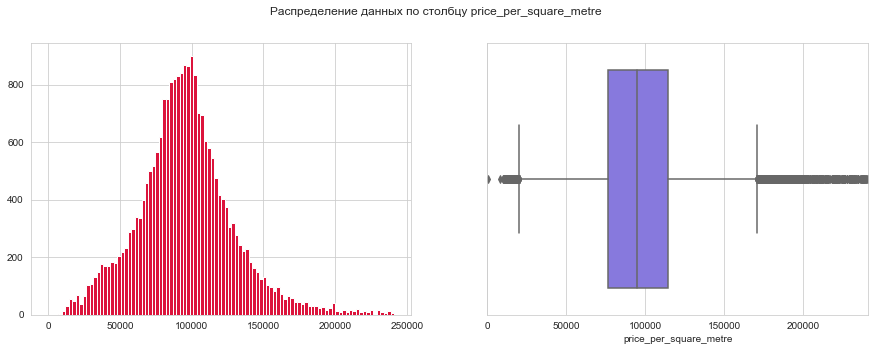

count      23605.000000
mean       99408.435628
std        50361.749193
min          111.000000
25%        76586.000000
50%        95000.000000
75%       114209.000000
max      1907500.000000
Name: price_per_square_metre, dtype: object
 
10 часто встречающихся значений
100000    259
83333      70
75000      58
80000      52
66666      52
125000     51
50000      48
90000      45
116666     40
93750      37
Name: price_per_square_metre, dtype: int64


In [24]:
#запустим цикл для анализа столбцов, который будет выводить гистограму, ящик с усами, основные статистические показатели и 10 часто встречающихся значений
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height', 'price_per_square_metre']:
    sns.set_style('whitegrid')
    percentile_95 = np.percentile(real_estate_data[column], 95)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
    fig.suptitle('Распределение данных по столбцу {}'.format(column))
    real_estate_data[column].hist(range = (0, percentile_95*1.5), bins = 100, color="crimson", ax=ax[0])
    plt.ylim(0, percentile_95*1.5)
    sns.boxplot(real_estate_data[column], color="mediumslateblue", ax=ax[1])
    plt.xlim(0, percentile_95*1.5)
    plt.ticklabel_format(axis='x', style="plain")
    plt.show()
    print(real_estate_data[column].describe().apply(lambda x: format(x,'f')))
    print(' ')
    print('10 часто встречающихся значений')
    print(real_estate_data[column].value_counts().head(10))

В данных довольно много объектов, с очень большой общей площадью. Логично предположить, что в датасет попали не только объявления о продаже квартир, но и частных домов. Чтобы не смешивать выводы по двум этим разным категориям, имеет смысл ограничить выборку только теми наблюдениями, где общий метраж не выходит за пределы среднего метража петербургских коммунальных квартир. Удалим эти значения позже, на этапе избавления от выбросов. Всё остальное будем считать домами и не будем учитывать. Минимальное значение для общей площади квартиры в датасете - 12 кв. Такие микроквартиры можно найти в новостройках в городах-миллионниках России. Не будем считать это аномалией.

Аномалными выглядят квартиры, которые стоят меньше четырехсот тысяч рублей (такая всего одна) или больше двадцати миллионов.

Посмотрев на график, можно убедиться, что одно-, двух- и трёхкомнатные квартиры встречаются чаще всего. Объявлений с количеством комнат 6 и больше слишком мало, чтобы использовать их в общем анализе. Можно было бы выделить большие квартиры и дома в отдельный сегмент и изучить отдельно.

В большинстве случаев высота потолков колеблется от 2.5 до 3.5 метров. Высокие потолки в Петербурге - не редкость, особенно в центре. Это отличительная, продающая черта квартиры.

Удалять выбросы для получения более однородного датасета для анализа мы будем чуть ниже, а пока изучим время продажи квартиры

### Исследование время продажи квартиры

In [25]:
#посмотрим на самые часто встречающиеся значения
real_estate_data['days_exposition'].value_counts().head(10)

45.0    880
60.0    538
7.0     234
30.0    208
90.0    201
4.0     176
3.0     157
5.0     152
14.0    147
9.0     143
Name: days_exposition, dtype: int64

In [26]:
real_estate_data['days_exposition'].describe()

count    20434.000000
mean       180.905843
std        219.717326
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

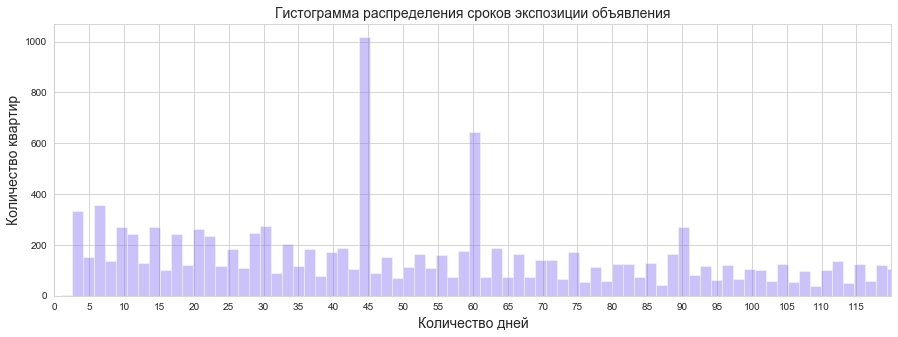

In [27]:
#посмотрим на гистограму по первым трём квартилям
plt.subplots(figsize = (15,5))
sns.distplot(real_estate_data['days_exposition'], bins=1000, hist=True, kde=False, color="mediumslateblue")
plt.title('Гистограмма распределения сроков экспозиции объявления', fontsize=14)
plt.xlabel('Количество дней', fontsize=14)
plt.ylabel('Количество квартир', fontsize=14)
plt.xlim(0, 120)
plt.xticks(np.arange(0, 120, step=5))
plt.show()

В данных большой разброс значений, стандартное отклонение больше среднего, а медиана и среднее далеки друг от друга. Особенно выбиваются пять значений: 7, 30, 45, 60 и 90 дней. Это вполне объяснимое явление, которое связано, скорее всего, с тарифами или условиями размещения. Чтобы точнее определить время продажи стоит удалить эти значения, т.к. они искажют результаты: квартиры скорее всего не были проданы за этот срок, только объявление было снято с публикации.

In [28]:
yandex_limits = [7, 30, 45, 60, 90]
print('{}% квартир, продались быстрее чем за неделю. Продать квартиру за 7 дней - это очень быстро.'.format(round(real_estate_data.query('days_exposition < 7')['days_exposition'].count() * 100 / len(real_estate_data.query('days_exposition not in @yandex_limits')['days_exposition']), 1)))
print('{}% квартир, продались в течение года.'.format(round(real_estate_data.query('days_exposition not in @yandex_limits').query('days_exposition <=365')['days_exposition'].count() * 100 / len(real_estate_data.query('days_exposition not in @yandex_limits')['days_exposition']), 1)))
print('{}% квартир, были выставленны на продажу дольше чем, два года. Что-то пошло не так, если объявление не обновлялось дольше 730 дней.'.format(round(real_estate_data.query('days_exposition not in @yandex_limits').query('days_exposition >= 730')['days_exposition'].count() * 100 / len(real_estate_data.query('days_exposition not in @yandex_limits')['days_exposition']), 1)))

2.8% квартир, продались быстрее чем за неделю. Продать квартиру за 7 дней - это очень быстро.
71.2% квартир, продались в течение года.
3.5% квартир, были выставленны на продажу дольше чем, два года. Что-то пошло не так, если объявление не обновлялось дольше 730 дней.


Большинство квартир продается в течение года. Странным может показаться наличие публикаций, которые были закрыты меньше чем за неделю, но без дополнительных данных невозможно оценить связано ли это с быстрой продажей, изменившимися внезапно обстоятельствами у продавца или мошенническими действиями.

### Избавление от необычных и выбивающихся значений

In [29]:
#удалим пропуски по правилу трёх сигм
columns_with_outliers = ['rooms', 'total_area', 'ceiling_height', 'price_per_square_metre']
def remove_outliers(data, column):
    mean = data[column].mean()
    sd = data[column].std()
    bottom_line = mean - 3 * sd
    top_line = mean + 3 * sd
    data = data[bottom_line < data[column]]
    data = data[data[column] < top_line]
    return data
    
for column in columns_with_outliers:
    real_estate_data = remove_outliers(real_estate_data, column) 

In [30]:
round((real_estate_data.shape[0] - original_size)/original_size, 2)

-0.04

После удаления выбросов датасет похудел на 4%, он стал более однородным, из него пропали все объявления с метражом больше 149 кв. метров и количеством комнат больше 5.

## <a id="step3">Шаг 3. Факторы, влияющие на стоимость квартиры </a>

### Исследование факторов, влияющих на стоимость квартиры

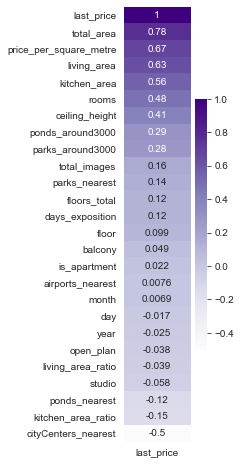

In [31]:
#Выделим столбец last_price, чтоб рассмотреть влияние различных параметров именно на цену
plt.figure(figsize=(1.5,8))
sns.heatmap(real_estate_data.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Purples", 
            annot=True)
plt.show()

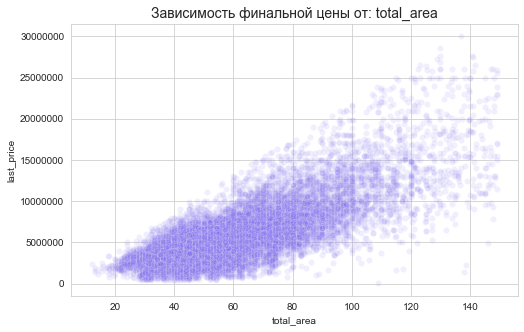

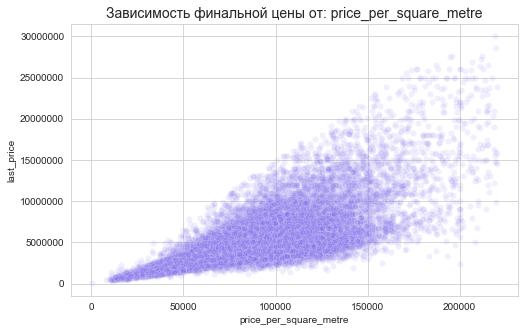

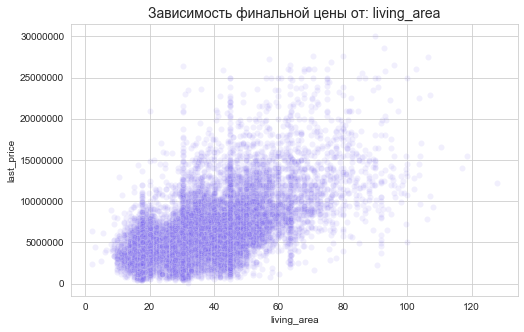

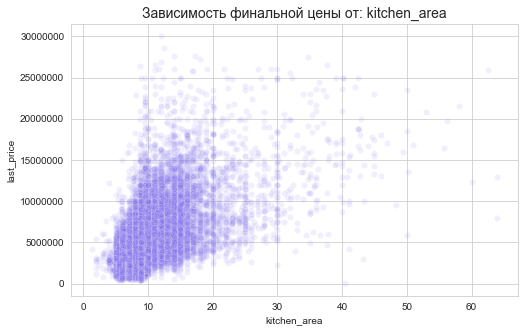

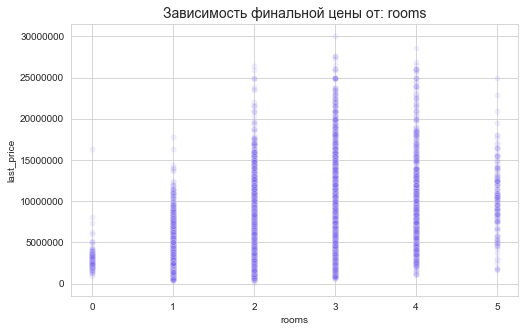

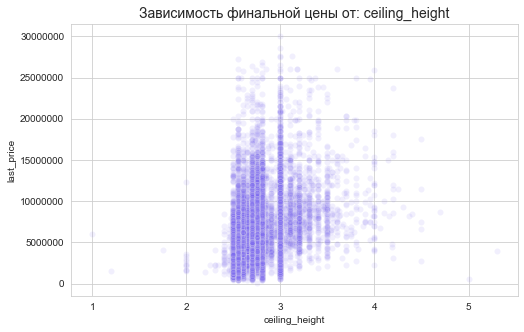

In [32]:
#построим графики scatterplot для самых коррелирующих признаков
for column in ['total_area', 'price_per_square_metre', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height']:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x= column, y="last_price", data=real_estate_data, alpha=0.1, color='mediumslateblue')
    plt.title('Зависимость финальной цены от: {}'.format(column), fontsize=14)
    plt.ticklabel_format(axis="y", style="plain")
    plt.show()

- Значительную корреляцию с ценой показали  параметры площади квартиры, жилой площади и площади кухни. 
- Не очень сильно, но коррелирует цена с количеством комнат и высотой потолка.
- Небольшое влияние оказывает присутствие парков/водоемов в радиусе 3-х километров
- Также есть заметная взаимосвязь между ценой и удаленностью от центра. Корреляция у этого параметра отрицательная, а это значит, что чем меньше расстояние до центра, тем больше будет цена. 
- Статистическая взаимосвязь цены на недвижимость и даты размещения объявления не была обнаружена.

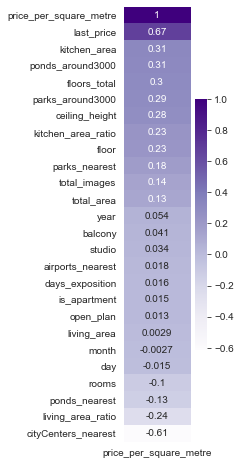

In [33]:
#посмотрим также на корреляцию с ценой за квадратный метр
plt.figure(figsize=(1.5,8))
sns.heatmap(real_estate_data.corr()[['price_per_square_metre']].sort_values(by='price_per_square_metre', ascending=False), cmap="Purples", 
            annot=True)
plt.show()

- Цена за квадратный метр больше всего коррелирует с финальной ценой, что ожидаемо, а также с параметром удаления от центра. Чем дальше от центра, тем меньше стоит квадратный метр
- некоторое влияние на цену за кв. метр оказывают такие параметры как площадь кухни, количество этажей, высота потолков и близость парков/водоемов
- Цена за квадратный метр совсем не коррелирует с общей площадью квартиры

Построим диаграммы размаха, чтобы оценить как соотносится цена квартиры с количеством комнат, категорией этажа, а также днем недели, месяцем и годом публикации объявления.

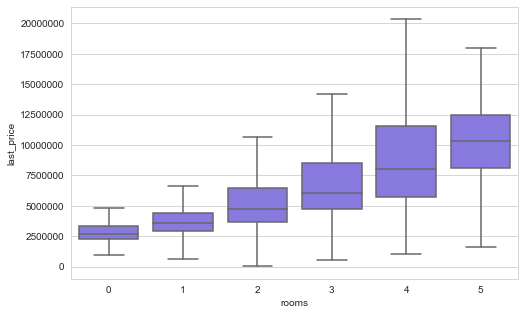

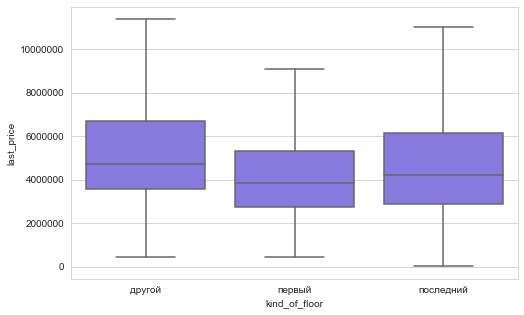

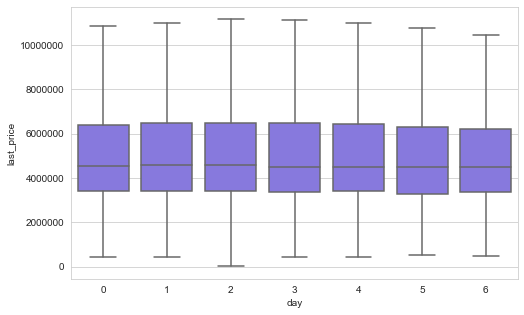

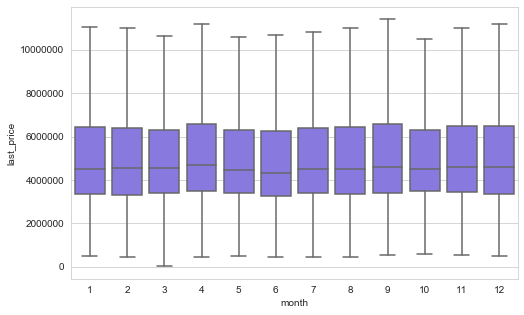

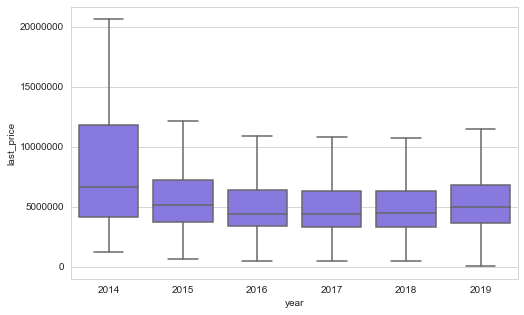

In [34]:
for column in ['rooms', 'kind_of_floor', 'day', 'month', 'year']:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=column, y="last_price", data=real_estate_data, color='mediumslateblue', showfliers = False)
    plt.ticklabel_format(axis="y", style="plain")
    plt.show()

In [35]:
#посмотрим какие данные у нас есть за 2014 год, чтобы не делать поспешных выводов
real_estate_data.query('year == "2014"')['month'].value_counts()

12    102
11     16
Name: month, dtype: int64

In [36]:
#и какие данные есть за 2019 год
real_estate_data.query('year == "2019"')['month'].value_counts()

4    926
3    841
2    527
1    404
5     55
Name: month, dtype: int64

- `количество комнат` - средняя цена логично увеличивается с увеличением количества комнат
- `тип этажа` - Дешевле всего обойдется квартира на первом этаже. В таких квартирах люди живут с зашторенными окнами, часто холодно, проникает шум с улицы. У квартир на последних этажах тоже есть свои недостатки, поэтому средняя цена тоже ниже, однако встречаются достаточно дорогие квартиры с мансардами. 
- `день` и `месяц` размещения объявления не оказывают никакого влияния на цену квартиры. 
- выделяется 2014 `год`, но данные есть только за два последних месяца. С одной стороны данных за 2014 год слишком мало, с другой стороны, мы поним, что курс рубля падал в течение 2014 года и резко обвалился в середине декабря. Результатом стало уменьшение реальных доходов населения и последующие снижение цен в 2015 году.

### 10 населённых пунктов с наибольшим числом объявлений и средняя цена за метр

In [37]:
#Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах.
top_ten = real_estate_data['locality_name'].value_counts().sort_values(ascending=False).head(10)
top_ten_prices = (real_estate_data
    .query('locality_name in @top_ten.index')
    .pivot_table(index = 'locality_name', values = 'price_per_square_metre', aggfunc='median')
    .sort_values(by = 'price_per_square_metre', ascending=False)
)
top_ten_prices

,price_per_square_metre
locality_name,
Санкт-Петербург,103840.0
Пушкин,99744.0
Кудрово,95555.0
посёлок Парголово,91779.5
Мурино,86249.5
посёлок Шушары,76829.0
Колпино,74722.0
Гатчина,67860.0
Всеволожск,65789.0


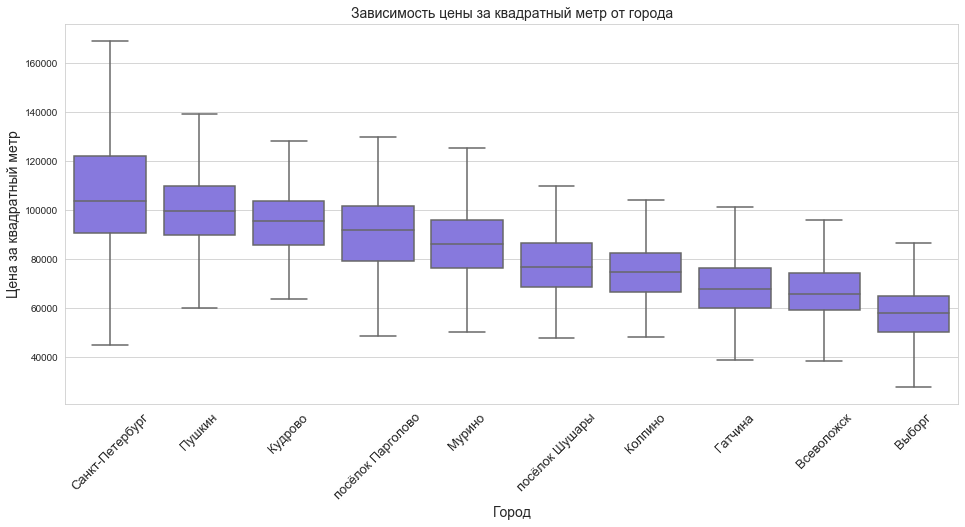

In [38]:
plt.figure(figsize=(16,7))
sns.boxplot(y="price_per_square_metre", x = "locality_name", data=real_estate_data.query('locality_name in @top_ten.index'), color='mediumslateblue', showfliers = False, order = top_ten_prices.index)
plt.title('Зависимость цены за квадратный метр от города', fontsize=14)
plt.xlabel('Город', fontsize=14)
plt.ylabel('Цена за квадратный метр', fontsize=14)
plt.xticks(fontsize=13, rotation=45)
plt.show()

Дороже всего квартира, как и ожидалось, будет в Санкт-Петербурге. Довольно дорогая недвижимость и в городе Пушкин. Этот город находится не так далеко от Петербурга, легко доступен как на автомобиле, так и на электричке (всего 30 минут). Там зелено, есть свои достопримечательности и рабочие места, развита вся необходимая для комфортного проживания социальная инфраструктура. 
Дешевле всего приобрести квартиру можно в Выборге. Из всех городов, попавших в топ-десять по количеству объявлений, Выборг расположен дальше всех. Добираться долго и дорого. 

### Исследование факторов, влияющих на стоимость квартиры в центре Санкт-Петербурга и в Лен. обл.

In [39]:
#ограничим датафрейм городом Санкт-Петербур и добавим новый столбец с расстоянием до центра в километрах
real_estate_data['cityCenters_km'] = (real_estate_data['cityCenters_nearest'] / 1000).astype('int')
spb = real_estate_data.query('locality_name == "Санкт-Петербург"')
#построим сводную таблицу с медианными ценами на квартиры
spb_prices = spb.pivot_table(index = 'cityCenters_km', values = 'last_price', aggfunc='median').sort_values(by = 'cityCenters_km')

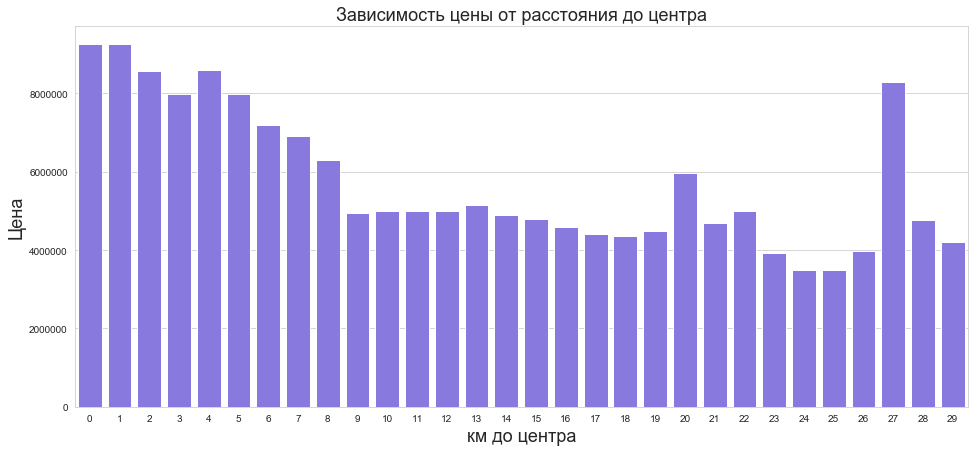

In [40]:
plt.figure(figsize=(16,7))
sns.barplot(x=spb_prices.index, y='last_price', data=spb_prices, color='mediumslateblue')
plt.title('Зависимость цены от расстояния до центра', fontsize=18)
plt.xlabel('км до центра', fontsize=18)
plt.ylabel('Цена', fontsize=18)
plt.show()

Цена снижается по мере удаления от центра, ограничим центр Петербурга радиусом 8 км, т.к. далее медианная цена заметно падает. Таким образом в поле нашего рассмотрения должны попасть Центральный, Адмиралтейский, Василеостровский, Петроградский районы.

In [41]:
#создадим функцию, выделяющую тип зоны
def zone(data):
    km = data['cityCenters_km']
    if data['locality_name'] != "Санкт-Петербург":
        return 'Лен. обл.'
    else:
        if km <= 8:
            return 'Центр'
        else:
            return 'Санкт-Петербург'
#добавим тип зоны в отдельный столбец    
real_estate_data['zone'] = real_estate_data.apply(zone, axis = 1)

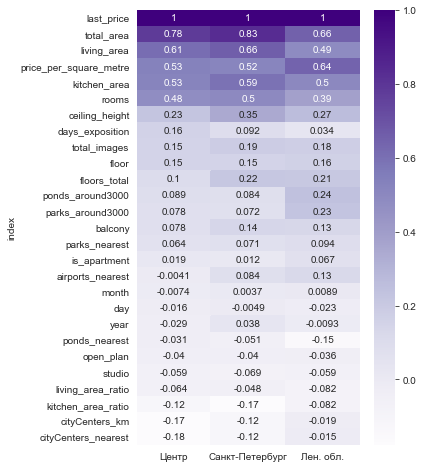

In [42]:
#сделаем срезы, посчитаем корреляцию с финальной ценой
center_corr = real_estate_data.query('zone == "Центр"').corr()[['last_price']].reset_index()
spb_corr = real_estate_data.query('zone == "Санкт-Петербург"').corr()[['last_price']].reset_index()
lo_corr = real_estate_data.query('zone == "Лен. обл."').corr()[['last_price']].reset_index()

#объеденим в один датафрейм
spb_center_corr = center_corr.merge(spb_corr, on = 'index')
spb_center_lo_corr = spb_center_corr.merge(lo_corr, on = 'index')
spb_center_lo_corr.columns = ['index', 'Центр', 'Санкт-Петербург', 'Лен. обл.']

plt.figure(figsize=(5,8))
sns.heatmap(spb_center_lo_corr.set_index('index').sort_values('Центр', ascending=False), cmap="Purples", annot=True)
plt.show()

- сильнее всего площадь квартиры и количество комнат коррелируют с ценой в Санкт-Петербурге, чуть меньше в центре города, т.к. там видимо учитываются другие параметры, такие как возраст и состояние здания, ещё меньше корреляция в Лен.обл, т.к. там цена зависит не только от метража, но и от развитости и привлекательности населенного пункта. 
- высота потолка оказывает больше всего влияния в пределах Санкт-Петербурга, в центре города и в области это не такой значимый параметр. 
- после разбивки на зоны потерялась корреляция между ценой и удаленностью от центра. А значит, что расстояние до центра сказывается на цене, только если выбирать между квартирой в центре, или в городе, или в области. После того как интересующая зона выбрана, в её пределах удаленность от центра города Санкт-Петербург уже не играет роли.

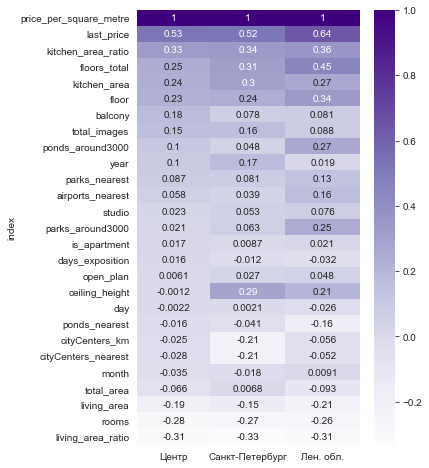

In [43]:
#сделаем срезы, посчитаем корреляцию с ценой за кв. метр
center_corr = real_estate_data.query('zone == "Центр"').corr()[['price_per_square_metre']].reset_index()
spb_corr = real_estate_data.query('zone == "Санкт-Петербург"').corr()[['price_per_square_metre']].reset_index()
lo_corr = real_estate_data.query('zone == "Лен. обл."').corr()[['price_per_square_metre']].reset_index()

#объеденим в один датафрейм
spb_center_corr = center_corr.merge(spb_corr, on = 'index')
spb_center_lo_corr = spb_center_corr.merge(lo_corr, on = 'index')
spb_center_lo_corr.columns = ['index', 'Центр', 'Санкт-Петербург', 'Лен. обл.']

plt.figure(figsize=(5,8))
sns.heatmap(spb_center_lo_corr.set_index('index').sort_values('Центр', ascending=False), cmap="Purples", annot=True)
plt.show()

- Цена за квадратный метр влияет на финальную стоимость квартиры больше в Лен. области, чем в Санкт-Петербурге и его центре, где учитывается множество других параметров
- Некоторое значение имеет отношение площади кухни и жилой площади к общей площади квартиры. Чем больше кухня и меньше жилая площадь по отношению к общей площади, тем дороже кв. метр.
- Слабая отрицательная корреляция наблюдается с количетством комнат. Т.е. чем меньше комнат в квартире, тем дороже кв. метр  


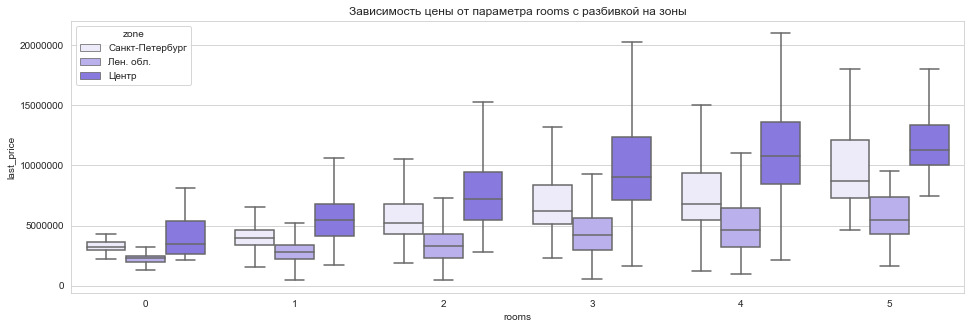

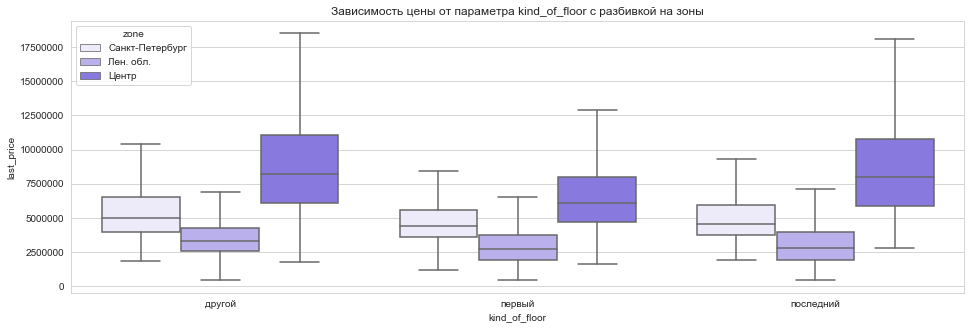

In [44]:
for column in ['rooms', 'kind_of_floor']:
    plt.figure(figsize=(16,5))
    sns.boxplot(x=column, y="last_price", hue= 'zone', data=real_estate_data, color='mediumslateblue', showfliers = False)
    plt.ticklabel_format(axis="y", style="plain")
    plt.title('Зависимость цены от параметра {} с разбивкой на зоны'.format(column))
    plt.show()

- На графиках с рабивкой на зоны видно, что цена увеличивается с увеличением количества комнат. Это мы уже видели.
- В центре квартиры на последнем этаже стоят также дорого как и других этажах. Видимо центре чаще встречаются мансарды, расширяющие чердачное пространство. Ценится доступ на крышу и вид из окна.

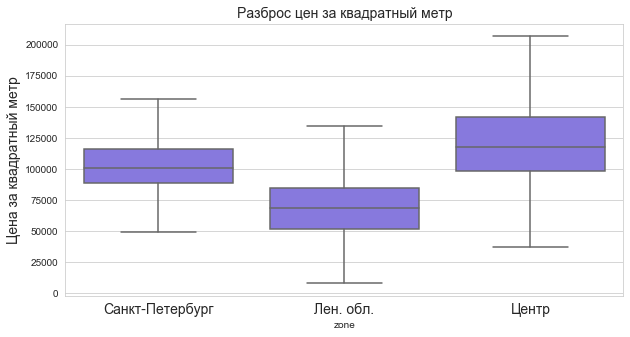

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(y="price_per_square_metre", x = "zone", data=real_estate_data, color='mediumslateblue', showfliers = False)
plt.title('Разброс цен за квадратный метр', fontsize=14)
plt.ylabel('Цена за квадратный метр', fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [46]:
real_estate_data.groupby('zone')['price_per_square_metre'].median()

zone
Лен. обл.           68656.0
Санкт-Петербург    101123.5
Центр              117936.0
Name: price_per_square_metre, dtype: float64

Результаты очевидны: 
- дороже всего средняя цена за квадратный метр в центре - **117936р**
- Санкт-Петербург - **101123р** за кв. метр.
- приобрести жилплощадь в Ленинградской области намного дешевле - **68656р** за кв. метр.

### Вывод

Факторы, оказывающие влияние на финальную стоимость квартиры:
   - общая площадь
   - жилая площадь
   - площадь кухни
   - количество комнат
   - высота потолков   

Факторы, оказывающие влияние на цену за квадратный метр:
   - расстояние до центра Санкт-Петербурга
   - площадь кухни
   - количество этажей
   - высота потолков
   - количество парков/водоемов в радиусе 3 км

Финальная цена за квартиру в объявлении и цена за квадратный метр почти **не зависят** от таких параметров как:
   - количество фотографий в объявлении
   - расстояние до ближайшего парка или водоема
   - количество балконов
   - расстояние до аэропорта (правда в выгрузку попали всего 300 квартир которые расплогаются в радиусе 6-10 км от аэропорта)
   - день и месяц публикации объявления

## <a id="step4">Шаг 4. Вывод </a>

В данном проекте была поставлена задача изучить параметры, влияющие на стоимость объектов недвижимости. Большинство пропусков в данных было заполнено в медианными значениями по разным группам. Типы данных были заменены на более удобные для работы и вычислений. После анализа параметров и удаления выбивающихся значений при помощи корреляции мы искали зависимость цены на недвижимость от различных факторов.

В анализе использовалась информация о продаже квартир в Санкт-Петербурге и Ленобласти с конца 2014 по середину 2019 года. Средние цены в 2014 году выше, чем в последующие, что обусловлено резким падением курса рубля в середине декабря 2014 года. Обвал курса привел к ажиотажному спросу на недвижимость как попытке сохранения накопленных населением средств. Однако ослабление рубля привело к спаду реальных доходов населения, и уже в 2015 отмечено резкое снижение цен на недвижимость для поддержания и увеличения темпов продаж.

Данные очень разнородны, в них попали как квартиры, так и загородные дома, как жильё эконом-класса, так и элитная недвижимость. Для более глубокого анализа стоило бы разделить данные на подгруппы и уже тогда изучать взаимосвязь факторов.

Больше всего объявлений и дороже всего недвижимость в Санкт-Петербурге. Достаточно высокая цена за квадратный метр в городе Пушкин, поселках Кудрово,  Парголово, Мурино. Дешевле обойдется квартира в Выборге, но этот город расположен слишком далеко от Санкт-Петербурга и является скорее самостоятельной единицей, нежели пригородом Петербурга, из которого можно каждый день ездить на работу в город.

Большинство квартир продается в течение первых шести месяцев. Аномальными выглядят объявления о продаже, которые закрылись быстрее чем за неделю или продержались больше двух лет. 

Помимо населенного пункта на финальную цену квартиры ожидаемо влияют размеры кухни, жилой и общей площадей, количество комнат и высота потолков. При этом на цене за квадратный метр сказываются такие параметры как: расстояние до центра Санкт-Петербурга, площадь кухни, количество этажей в доме, высота потолков, количество парков/водоемов в радиусе 3 км.